
# House Pricing Prediction with Regularized Linear Regressions and PCA


### Problem Statement

A US-based housing company named Surprise Housing has decided to enter the Australian market. The company uses data analytics to purchase houses at a price below their actual values and flip them on at a higher price. For the same purpose, the company has collected a data set from the sale of houses in Australia. 

The company is looking at prospective properties to buy to enter the market. We are required to build a regression model using regularisation in order to predict the actual value of the prospective properties and decide whether to invest in them or not.

 
#### The company wants to know:

Which variables are significant in predicting the price of a house.

How well those variables describe the price of a house.

 
### Business Goal 

We are required to model the price of houses with the available independent variables. This model will then be used by the management to understand how exactly the prices vary with the variables. They can accordingly manipulate the strategy of the firm and concentrate on areas that will yield high returns. Further, the model will be a good way for management to understand the pricing dynamics of a new market.

### Steps and Approach

#### 1. Basic Data Understanding and Cleaning
#### 2. EDA, Outliers treatment, Feature Engineering and Data Visualization
#### 3. Data Preparation - Categorical variables, Split train/test sets, Scaling etc
#### 4. Basic Linear Regression Model Building and Evaluation
#### 5. Ridge Regularization & Evaluation
#### 6. Lasso Regularization & Evaluation
#### 7. PCA 
#### 8. Conclusion



Let's start with importing essential libraries

In [1]:
import numpy as np
import pandas as pd

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

from sklearn import metrics
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold

from matplotlib.pyplot import plot
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")


## 1. Basic Data Understanding and Cleaning

In [3]:
house = pd.read_csv('train.csv')

In [4]:
print(house.shape)
house.head()

(1460, 81)


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [6]:
def missing_values_details(df):
    return list(zip(df[ df.columns[df.isnull().any()] ].isnull(), 
                    df[ df.columns[df.isnull().any()] ].isnull().sum(),
                    df[ df.columns[df.isnull().any()] ].isnull().sum() / len(df.index) * 100, 
                    df[ df.columns[df.isnull().any()] ].dtypes))
                    
#df[ df.columns[df.isnull().any()] ].dtypes)

In [7]:
missing_values_details(house)

[('LotFrontage', 259, 17.73972602739726, dtype('float64')),
 ('Alley', 1369, 93.76712328767123, dtype('O')),
 ('MasVnrType', 8, 0.547945205479452, dtype('O')),
 ('MasVnrArea', 8, 0.547945205479452, dtype('float64')),
 ('BsmtQual', 37, 2.5342465753424657, dtype('O')),
 ('BsmtCond', 37, 2.5342465753424657, dtype('O')),
 ('BsmtExposure', 38, 2.6027397260273974, dtype('O')),
 ('BsmtFinType1', 37, 2.5342465753424657, dtype('O')),
 ('BsmtFinType2', 38, 2.6027397260273974, dtype('O')),
 ('Electrical', 1, 0.0684931506849315, dtype('O')),
 ('FireplaceQu', 690, 47.26027397260274, dtype('O')),
 ('GarageType', 81, 5.5479452054794525, dtype('O')),
 ('GarageYrBlt', 81, 5.5479452054794525, dtype('float64')),
 ('GarageFinish', 81, 5.5479452054794525, dtype('O')),
 ('GarageQual', 81, 5.5479452054794525, dtype('O')),
 ('GarageCond', 81, 5.5479452054794525, dtype('O')),
 ('PoolQC', 1453, 99.52054794520548, dtype('O')),
 ('Fence', 1179, 80.75342465753424, dtype('O')),
 ('MiscFeature', 1406, 96.30136986301

There are 1460 data points and 81 attributes in the data set. 
We see a lot of NaN in the columns like Fence, MiscFeature etc. But looking at the csv file opened as XLS, these are actually NA meaning "Not applicable" or "None"( for example, No Fence). So these have been wrongly converted in to NaN (missing) when the csv is imported.

So we should try with 'keep_default_na=False'  while reading the csv, so that NA will be read as NA only, not as NaN.

But, also note the numerical attributes - LotFrontage, MasVnrArea, GarageYrBlt. These also contain 'NA' which really mean missing values. So we should read these NA as NaN. 


In [8]:
del house
house = pd.read_csv('train.csv', na_values={"LotFrontage" : ['NA'], "MasVnrArea" : ['NA'], "GarageYrBlt" : ['NA']}, keep_default_na=False)
house.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NA,Reg,Lvl,AllPub,...,0,NA,NA,NA,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NA,Reg,Lvl,AllPub,...,0,NA,NA,NA,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NA,IR1,Lvl,AllPub,...,0,NA,NA,NA,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NA,IR1,Lvl,AllPub,...,0,NA,NA,NA,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NA,IR1,Lvl,AllPub,...,0,NA,NA,NA,0,12,2008,WD,Normal,250000


In [9]:
### Verify if NA has been correctly imported as NA only, not as NaN

house.Fence.value_counts()

NA       1179
MnPrv     157
GdPrv      59
GdWo       54
MnWw       11
Name: Fence, dtype: int64

In [10]:
house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          1460 non-null   object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

Saleprice is the target (predicted) variable

In [11]:
missing_values_details(house)

[('LotFrontage', 259, 17.73972602739726, dtype('float64')),
 ('MasVnrArea', 8, 0.547945205479452, dtype('float64')),
 ('GarageYrBlt', 81, 5.5479452054794525, dtype('float64'))]

##### LotFrontage is missing for more than 17% of the data points. It can be dropped instead of trying to impute them with some values.

In [12]:
## Take a backup of original data set before cleaning
house_orig = house.copy()

house = house.drop('LotFrontage', axis=1)

In [13]:
house.shape

(1460, 80)

In [14]:
missing_values_details(house)

[('MasVnrArea', 8, 0.547945205479452, dtype('float64')),
 ('GarageYrBlt', 81, 5.5479452054794525, dtype('float64'))]

##### Let us look at GarageYrBlt which has more than 5% missing data. 

GarageYrBlt: Year garage was built 

YearRemodAdd: Remodel date (same as construction date if no remodeling or additions)

So can we fill the missing values in GarageYrBlt with YearRemodAdd ?, Let us see.

<AxesSubplot:>

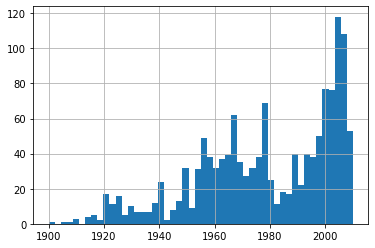

In [15]:
house['GarageYrBlt'].hist(bins=50)

<AxesSubplot:>

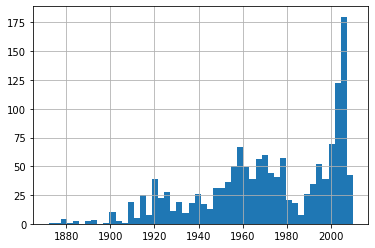

In [16]:
house['YearBuilt'].hist(bins=50)

GarageYrBlt and YearBuilt distributions seem to follow very similar pattern after 1950s. So we can suppose that the houses built after around 1950s have garages built along with the house. 


<AxesSubplot:>

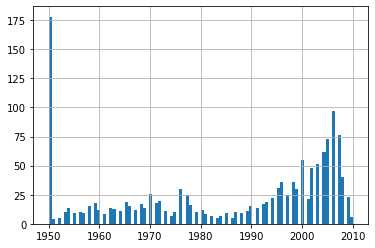

In [17]:
house['YearRemodAdd'].hist(bins=100)

In [18]:
house['YearRemodAdd'].value_counts()

1950    178
2006     97
2007     76
2005     73
2004     62
       ... 
2010      6
1983      5
1952      5
1986      5
1951      4
Name: YearRemodAdd, Length: 61, dtype: int64

We can see a spike of Remodifications done in the year 1950. 
Let us separate out the houses which have GarageYrBlt missing.

In [19]:
houses_without_garage = house[house['GarageYrBlt'].isnull()]

In [20]:
houses_without_garage['YearRemodAdd'].value_counts()

1950    23
1971     4
2008     4
2006     3
1995     3
2005     2
1996     2
1955     2
1959     2
1970     2
1972     2
1982     2
2003     2
2000     2
1997     1
1998     1
1954     1
1956     1
1958     1
2002     1
1961     1
1965     1
1966     1
1968     1
1969     1
2001     1
1999     1
1974     1
1975     1
1977     1
1978     1
2004     1
2007     1
1987     1
1988     1
1990     1
1991     1
1992     1
1994     1
1985     1
Name: YearRemodAdd, dtype: int64

<AxesSubplot:>

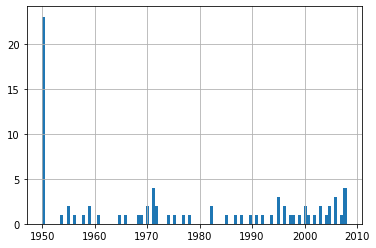

In [21]:
houses_without_garage['YearRemodAdd'].hist(bins=100)

##### Interestingly, out of the houses which have missing GarageYrBlt missing, there is a spike in the remodification attribute for the year 1950.
So it seems these houses also have been remodified in high numbers in year 1950 and probably garage would have been built in the same year.

##### Hence, it feels logical to impute missing GarageYrBlt years with the 'YearRemodAdd' values.

In [22]:
del houses_without_garage

house.GarageYrBlt =  house.GarageYrBlt.fillna(house.YearRemodAdd)

In [23]:
house.GarageYrBlt.isnull().any()

False

In [24]:
missing_values_details(house)

[('MasVnrArea', 8, 0.547945205479452, dtype('float64'))]

#### Now, Only MasVnrArea has missing values and only around 0.5 percent of total number of houses. So we can safely remove those values.

In [25]:
house = house[~house.MasVnrArea.isnull()]

In [26]:
house.shape

(1452, 80)

In [27]:
missing_values_details(house)

[]

Now, we have done cleaning of the data set, let us move on to the next stage.

## 2. EDA, Outliers treatment, Feature Engineering and Data Visualization

In [28]:
house.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1452 entries, 0 to 1459
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1452 non-null   int64  
 1   MSSubClass     1452 non-null   int64  
 2   MSZoning       1452 non-null   object 
 3   LotArea        1452 non-null   int64  
 4   Street         1452 non-null   object 
 5   Alley          1452 non-null   object 
 6   LotShape       1452 non-null   object 
 7   LandContour    1452 non-null   object 
 8   Utilities      1452 non-null   object 
 9   LotConfig      1452 non-null   object 
 10  LandSlope      1452 non-null   object 
 11  Neighborhood   1452 non-null   object 
 12  Condition1     1452 non-null   object 
 13  Condition2     1452 non-null   object 
 14  BldgType       1452 non-null   object 
 15  HouseStyle     1452 non-null   object 
 16  OverallQual    1452 non-null   int64  
 17  OverallCond    1452 non-null   int64  
 18  YearBuil

### Check for ouliers in target variable 

In [29]:
print("Skewness: %f" % house['SalePrice'].skew())

Skewness: 1.884045


<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

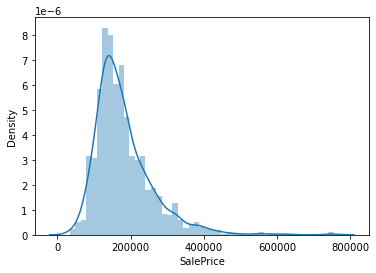

In [30]:
sns.distplot(house.SalePrice)

##### Sale Price distribution is skewed to the right side long tail with outliers  

In [31]:
house.SalePrice.describe(percentiles=[.25, .5, .75, .90, .95, .97, .99])

count      1452.000000
mean     180615.063361
std       79285.541485
min       34900.000000
25%      129900.000000
50%      162700.000000
75%      214000.000000
90%      277950.000000
95%      325793.200000
97%      373205.000000
99%      439377.800000
max      755000.000000
Name: SalePrice, dtype: float64

In [32]:
len(house[house.SalePrice >= house.SalePrice.quantile(0.95)])

73

#### Let us use log transformation for the target variable to normalize it, because it is skewed to the right. 
Dropping outliers can be avoided as much as possible as the data set is small.

In [33]:
house["SalePrice"] = np.log(house["SalePrice"])

<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

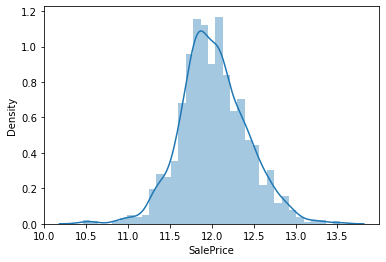

In [35]:
sns.distplot(house.SalePrice)

In [36]:
print("Skewness: %f" % house['SalePrice'].skew())

Skewness: 0.121947


##### Now we see Sale Price is not much affected by outliers

### Numerical Variables

In [37]:
numeric_vars = house.select_dtypes(include=['float64', 'int64']).columns

In [38]:
numeric_vars

Index(['Id', 'MSSubClass', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

The variables MSSubClass should be actually categorical, as per the data dictionary. It needs to be converted.

In [39]:
# "MSSubClass"
house['MSSubClass'] = house['MSSubClass'].astype('object')

##### Let us analyze MoSold ( Month Sold ) and YrSold ( Year Sold ) and see if they are necessary

In [40]:
house.MoSold.value_counts()

6     253
7     234
5     202
4     141
8     121
3     104
10     89
11     78
9      62
12     58
1      58
2      52
Name: MoSold, dtype: int64

In [41]:
house.groupby('MoSold').SalePrice.mean()

MoSold
1     11.963300
2     12.047052
3     12.025088
4     11.972056
5     11.982118
6     12.019938
7     12.042791
8     12.048440
9     12.083218
10    12.020135
11    12.073170
12    12.061407
Name: SalePrice, dtype: float64

<AxesSubplot:xlabel='MoSold'>

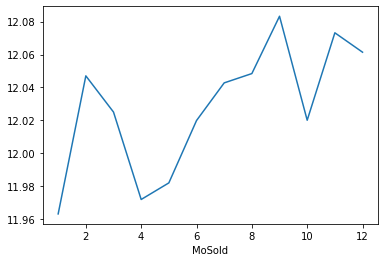

In [42]:
house.groupby('MoSold').SalePrice.mean().plot()

##### In the above plot, we see the houses sold in the second half of the year (starting from month 7) were generally sold at a higher average price than those sold in the first half of the year.
This might be a factor to be considered to predict the sale price. That is we can create a new categorical variable "2_half_year" from the MoSold variable. 

Let us explore YrSold variable

In [43]:
house.groupby('YrSold').SalePrice.mean()

YrSold
2006    12.031743
2007    12.049709
2008    12.011945
2009    12.008385
2010    11.999438
Name: SalePrice, dtype: float64

<AxesSubplot:xlabel='YrSold'>

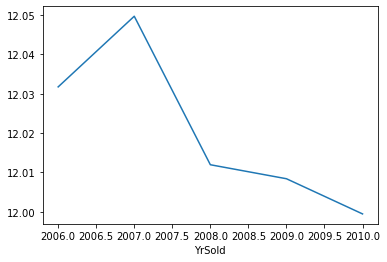

In [44]:
house.groupby('YrSold').SalePrice.mean().plot()

##### We do see a downward trend for SalePrice with respect to the year of sale. But this could be a temporary trend which we cannot predict for the following years or future. So we can drop this attribute. We can also drop Id variable which is of no use.

In [45]:
house = house.drop(['YrSold', 'Id'], axis=1)

house.shape

(1452, 78)

#### Create a new categorical variable "2_half_year" from the MoSold variable. 

In [46]:
house['2_half_year'] = house.MoSold.map(lambda x: 1 if x > 6  else 0)

In [47]:
house.groupby('2_half_year').SalePrice.describe()

,count,mean,std,min,25%,50%,75%,max
2_half_year,,,,,,,,
0,810.0,12.000517,0.388762,10.542706,11.767568,11.970350,12.230765,13.534473
1,642.0,12.049992,0.410997,10.460242,11.791502,12.042052,12.323745,13.521139


In [48]:
# We can drop MoSold as we have extracted another meaningful feature 2_half_year from the same.
house = house.drop(['MoSold'], axis=1)
house.shape

(1452, 78)

In [49]:
numeric_vars = house.select_dtypes(include=['float64', 'int64']).columns
numeric_vars

Index(['LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
       '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath',
       'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr',
       'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea',
       'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'PoolArea', 'MiscVal', 'SalePrice', '2_half_year'],
      dtype='object')

In [50]:
len(numeric_vars)

34

In [52]:
print(house.YearBuilt.min())
print(house.YearBuilt.max())

1872
2010


In [53]:
print(house.YearRemodAdd.min())
print(house.YearRemodAdd.max())

1950
2010


#### We see that the YearBuilt ranges from 1872 to 2009. Let us derive a new feature - 'age of the house', as years by themselves are not useful in regression.
Let us have 2010 as referrence to calculate the age of the house.

In [54]:
max = house.YearRemodAdd.max()
house['age_of_house'] = max - house.YearBuilt  

In [55]:
house['age_of_house'].describe()

count    1452.000000
mean       38.883609
std        30.193761
min         0.000000
25%        10.000000
50%        38.000000
75%        56.000000
max       138.000000
Name: age_of_house, dtype: float64

#### Similarly let us derive a new feature "years_since_remod" and "age_of_garage" based on years elapsed after YearRemodAdd and GarageYrBlt respectively.

In [56]:
max = house.YearRemodAdd.max() + 1
house["years_since_remod"] = max - house.YearRemodAdd 

In [57]:
house["years_since_remod"].describe()

count    1452.000000
mean       26.224518
std        20.652466
min         1.000000
25%         7.000000
50%        18.000000
75%        45.000000
max        61.000000
Name: years_since_remod, dtype: float64

In [58]:
max = house.GarageYrBlt.max() + 1
house["age_of_garage"] = max - house.GarageYrBlt

In [59]:
house["age_of_garage"].describe()

count    1452.000000
mean       32.804408
std        24.538194
min         1.000000
25%        10.000000
50%        32.000000
75%        51.000000
max       111.000000
Name: age_of_garage, dtype: float64

Drop the year variables as we have extracted age from them

In [60]:
house = house.drop(['YearBuilt', 'YearRemodAdd', 'GarageYrBlt'], axis=1)

#### Let us look at the distribution of numerical variables

array([[<AxesSubplot:title={'center':'LotArea'}>,
        <AxesSubplot:title={'center':'OverallQual'}>,
        <AxesSubplot:title={'center':'OverallCond'}>,
        <AxesSubplot:title={'center':'MasVnrArea'}>,
        <AxesSubplot:title={'center':'BsmtFinSF1'}>,
        <AxesSubplot:title={'center':'BsmtFinSF2'}>],
       [<AxesSubplot:title={'center':'BsmtUnfSF'}>,
        <AxesSubplot:title={'center':'TotalBsmtSF'}>,
        <AxesSubplot:title={'center':'1stFlrSF'}>,
        <AxesSubplot:title={'center':'2ndFlrSF'}>,
        <AxesSubplot:title={'center':'LowQualFinSF'}>,
        <AxesSubplot:title={'center':'GrLivArea'}>],
       [<AxesSubplot:title={'center':'BsmtFullBath'}>,
        <AxesSubplot:title={'center':'BsmtHalfBath'}>,
        <AxesSubplot:title={'center':'FullBath'}>,
        <AxesSubplot:title={'center':'HalfBath'}>,
        <AxesSubplot:title={'center':'BedroomAbvGr'}>,
        <AxesSubplot:title={'center':'KitchenAbvGr'}>],
       [<AxesSubplot:title={'center':'TotRm

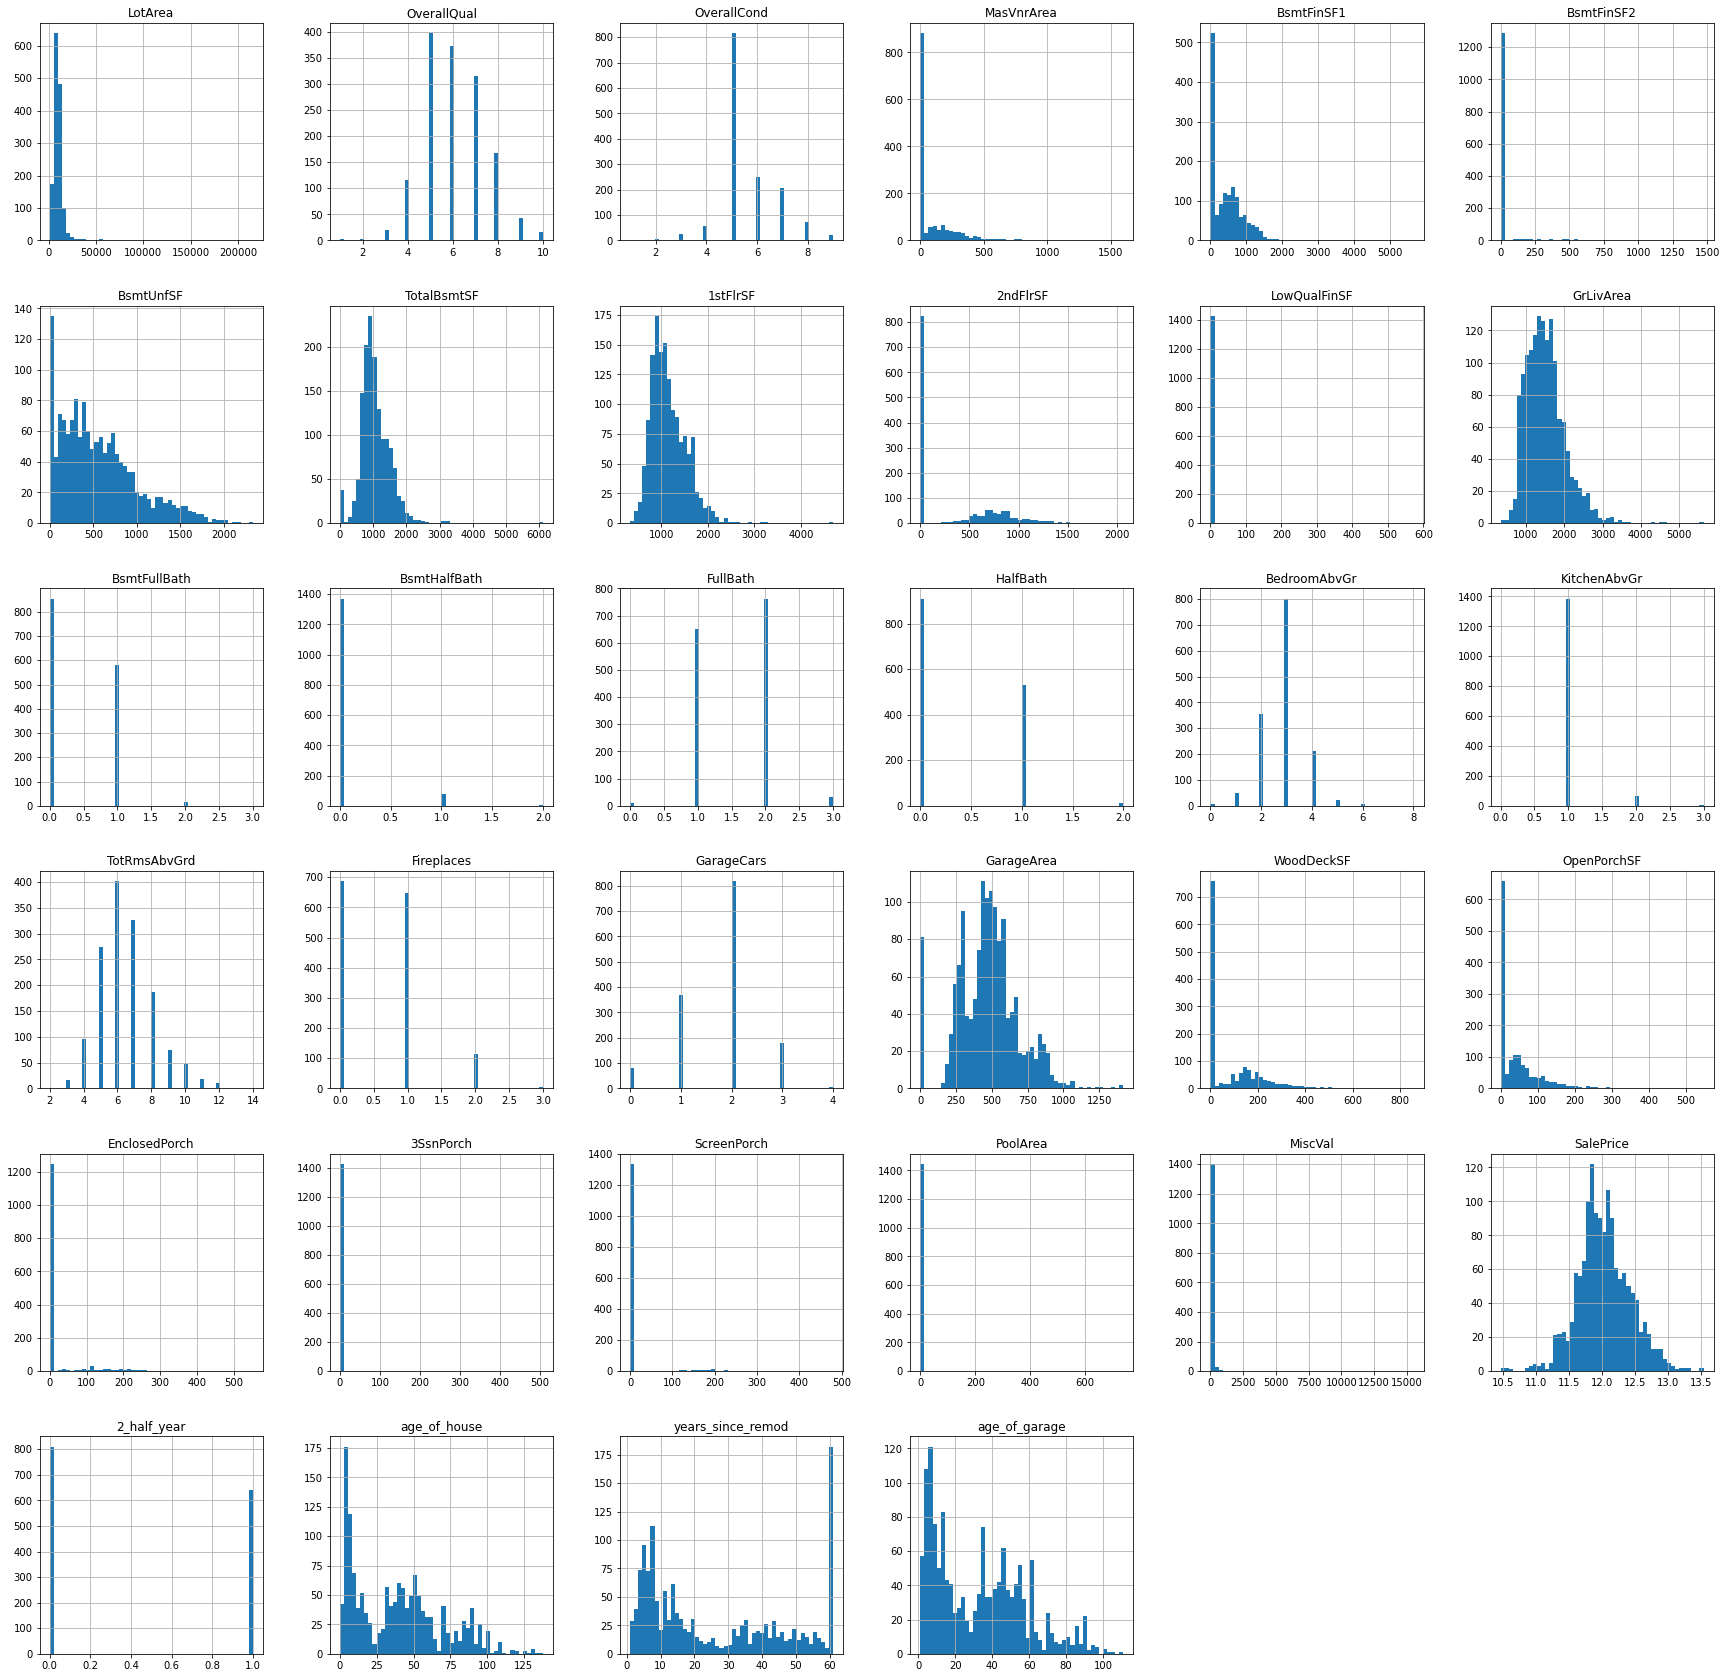

In [61]:
house.hist(bins=50, figsize=(30,30))

#### Correlation heat map of Numerical Variables

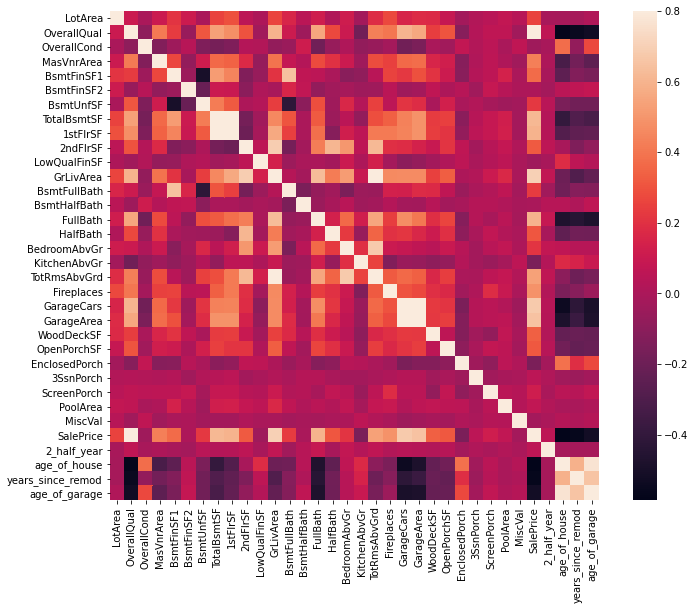

In [62]:
import matplotlib.pyplot as plt

corrmat = house.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);

##### Look at the highest correlated numerical variables with the target variable SalePrice.

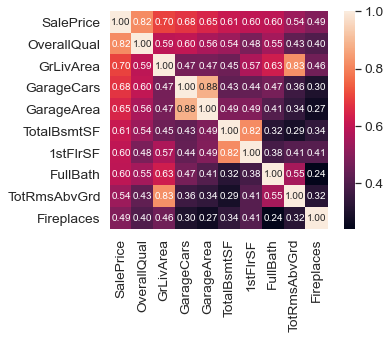

In [63]:
# Select top variables for correlation matrix
#saleprice correlation matrix


k = 10 #number of variables for heatmap
cols = corrmat.nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(house[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

#### Pairplots of SalePrice with the variables with highest correlation with it.

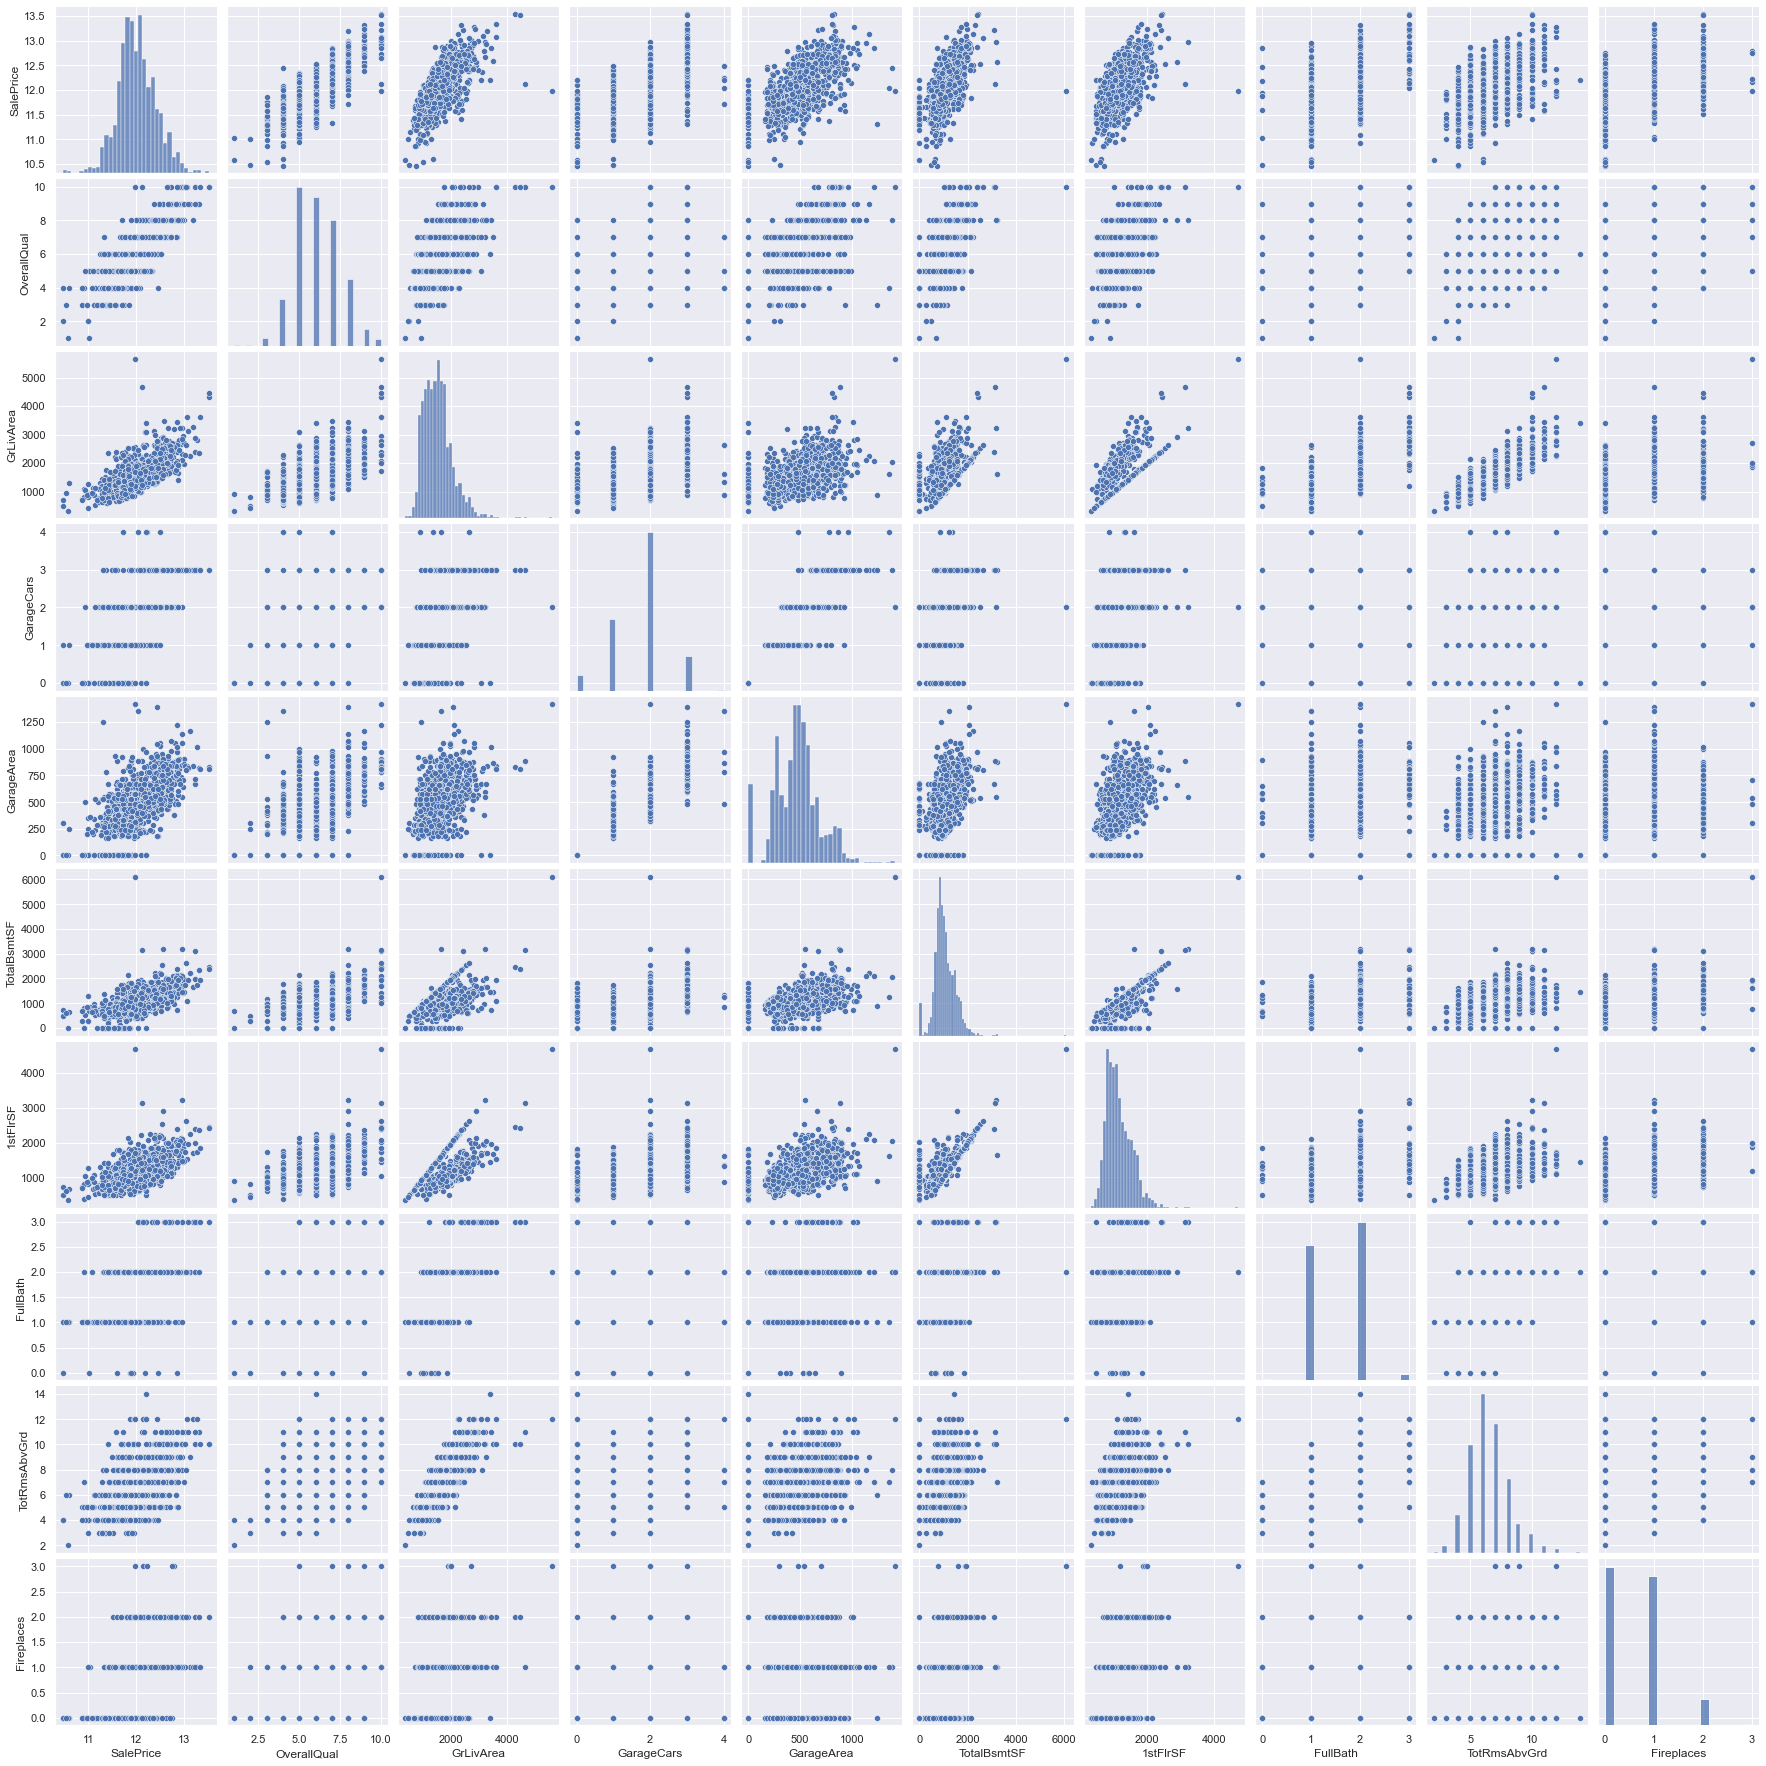

In [65]:
#sns.set()
sns.pairplot(house[cols])

#### We see a good linear relation of the variables with the SalePrice though with few outliers. 

Let us check and address the outliers.

In [67]:
house.GrLivArea.describe(percentiles=[.25, .5, .75, .90, .95, .97, .98, .99])

count    1452.000000
mean     1514.091598
std       525.627765
min       334.000000
25%      1128.000000
50%      1461.500000
75%      1776.000000
90%      2157.900000
95%      2463.800000
97%      2633.470000
98%      2783.820000
99%      3125.720000
max      5642.000000
Name: GrLivArea, dtype: float64

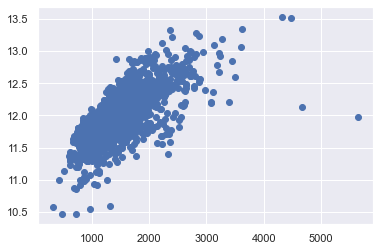

In [66]:
fig = plt.figure()
plt.scatter(house.GrLivArea, house.SalePrice)

##### There are a couple of outliers with GrLivArea > 4500 which we will remove.

In [75]:
len(house[house.GrLivArea >= 4500])

2

In [76]:
house = house[house.GrLivArea < 4500 ]

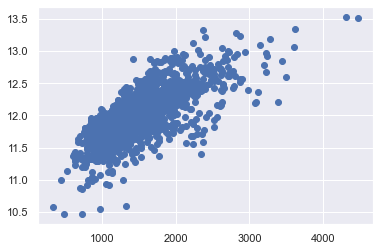

In [77]:
fig = plt.figure()
plt.scatter(house.GrLivArea, house.SalePrice)

## 3. Data Preparation - Categorical variables, Split train/test sets, Scaling etc

In [78]:
house_backup = house.copy()


In [79]:
# Uncomment this and use when necessary.

#house = house_backup.copy()

##### Let us now go to the categorical variables and do necessary encodings to convert them to numerical.

In [81]:
house.shape

(1450, 78)

In [82]:
categorical_vars = house.select_dtypes(include=['object']).columns
print(categorical_vars)
print(len(categorical_vars))

Index(['MSSubClass', 'MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour',
       'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1',
       'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl',
       'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond',
       'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
       'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical',
       'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType',
       'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC',
       'Fence', 'MiscFeature', 'SaleType', 'SaleCondition'],
      dtype='object')
44


#### The following categorical variables are ordinal in nature ordered by level of quality etc.

ExterQual, ExterCond, BsmtQual, BsmtCond, 
BsmtExposure, BsmtFinType1, BsmtFinType2, HeatingQC, CentralAir, KitchenQual, 
FireplaceQu, GarageQual, GarageCond, PoolQC      

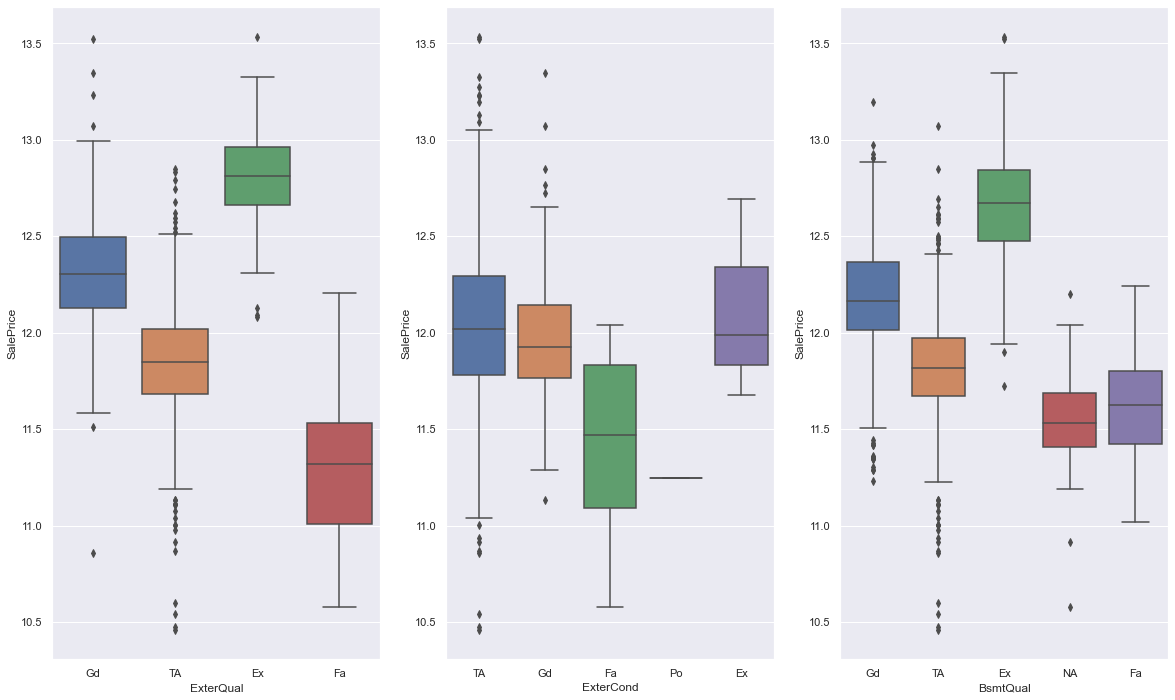

In [83]:
plt.figure(figsize=(20, 12))

plt.subplot(1,3,1)
sns.boxplot(x = 'ExterQual', y = 'SalePrice', data = house)
plt.subplot(1,3,2)
sns.boxplot(x = 'ExterCond', y = 'SalePrice', data = house)
plt.subplot(1,3,3)
sns.boxplot(x = 'BsmtQual', y = 'SalePrice', data = house)
plt.show()

 
 ##### From data dictionary, we can see the following ordinal category variables can have different levels as mentioned below.
   
   ExterQual, ExterCond, BsmtQual, BsmtCond, HeatingQC, KitchenQual, FireplaceQu, GarageQual, GarageCond, PoolQC 
   
       Ex	Excellent 
       Gd	Good 
       TA	Typical 
       Fa	Fair 
       Po	Poor 
       NA	No 
       
  We can map these different levels to corresponding numbers in order like 0,1,2...etc.
  
  NA - 0
  Po - 1
  Fa - 2
  TA - 3
  Gd - 4
  Ex - 5
  
  

In [84]:
ordinal_cat = ['ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond', 'HeatingQC', 
               'KitchenQual', 'FireplaceQu', 'GarageQual', 'GarageCond', 'PoolQC']

def quality_map(x):
    return x.map({'NA': 0, "Po": 1, "Fa": 2, "TA": 3, "Gd": 4, "Ex" : 5})

house[ordinal_cat] = house[ordinal_cat].apply(quality_map)


In [85]:
house[ordinal_cat].head()

,ExterQual,ExterCond,BsmtQual,BsmtCond,HeatingQC,KitchenQual,FireplaceQu,GarageQual,GarageCond,PoolQC
0,4,3,4,3,5,4,0,3,3,0
1,3,3,4,3,5,3,3,3,3,0
2,4,3,4,3,5,4,3,3,3,0
3,3,3,3,4,4,4,4,3,3,0
4,4,3,4,3,5,4,3,3,3,0


In [86]:
house['PoolQC'].value_counts()

0    1444
5       2
4       2
2       2
Name: PoolQC, dtype: int64


##### The remaining ordinal categorical variables and their respective levels are as follows. We have to map them to numbers too.

BsmtExposure,

       Gd	Good Exposure
       Av	Average Exposure (split levels or foyers typically score average or above)	
       Mn	Mimimum Exposure
       No	No Exposure
       NA	No Basement
       
BsmtFinType1, BsmtFinType2

       GLQ	Good Living Quarters
       ALQ	Average Living Quarters
       BLQ	Below Average Living Quarters	
       Rec	Average Rec Room
       LwQ	Low Quality
       Unf	Unfinshed
       NA	No Basement
       
CentralAir

       N	No
       Y	Yes

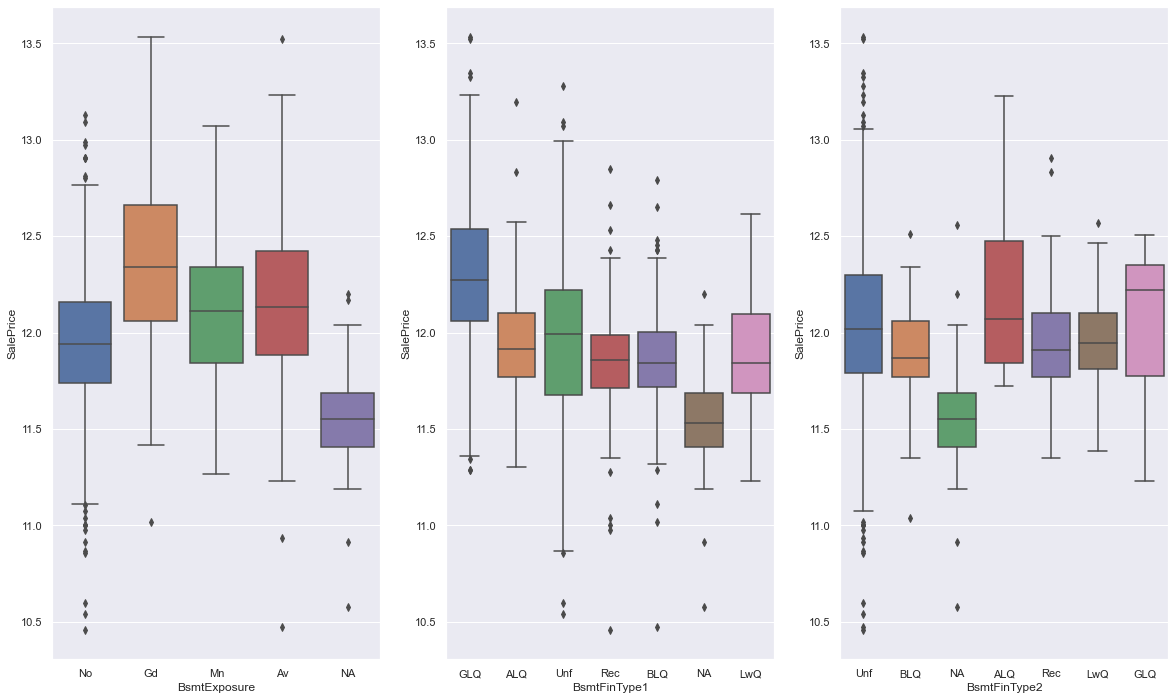

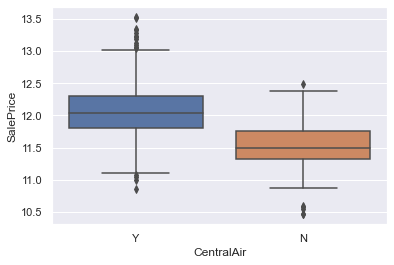

In [87]:
plt.figure(figsize=(20, 12))

plt.subplot(1,3,1)
sns.boxplot(x = 'BsmtExposure', y = 'SalePrice', data = house)
plt.subplot(1,3,2)
sns.boxplot(x = 'BsmtFinType1', y = 'SalePrice', data = house)
plt.subplot(1,3,3)
sns.boxplot(x = 'BsmtFinType2', y = 'SalePrice', data = house)
plt.show()
sns.boxplot(x = 'CentralAir', y = 'SalePrice', data = house)
plt.show()

In [89]:
def map1(x):
    return x.map({"NA": 0, "No": 1, "Mn": 2, "Av" : 3, "Gd" : 4})

house['BsmtExposure'] = house[['BsmtExposure']].apply(map1)



def map2(x):
    return x.map({'NA': 0, 'Unf': 1, 'LwQ': 2, 'Rec': 3, 'BLQ': 4, 'ALQ': 5, 'GLQ': 6})

house['BsmtFinType1'] = house[['BsmtFinType1']].apply(map2)
house['BsmtFinType2'] = house[['BsmtFinType2']].apply(map2)


def map3(x):
    return x.map({'Y': 1, 'N': 0})

house['CentralAir'] = house[['CentralAir']].apply(map3)


In [90]:
print(house['BsmtExposure'].value_counts())
print(house['BsmtFinType1'].value_counts())
print(house['BsmtFinType2'].value_counts())
print(house['CentralAir'].value_counts())

1    946
3    221
4    131
2    114
0     38
Name: BsmtExposure, dtype: int64
1    428
6    411
5    220
4    148
3    132
2     74
0     37
Name: BsmtFinType1, dtype: int64
1    1246
3      54
2      46
0      38
4      33
5      19
6      14
Name: BsmtFinType2, dtype: int64
1    1355
0      95
Name: CentralAir, dtype: int64


##### Now we have converted the ordinal categories, we will focus next on nominal categorical variables

In [91]:
ordinal_cat = ['ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond', 'HeatingQC', 
               'KitchenQual', 'FireplaceQu', 'GarageQual', 'GarageCond', 'PoolQC']

already_converted_list = ordinal_cat + ['BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'CentralAir']


nominal_list = np.setdiff1d(categorical_vars, already_converted_list)

print(nominal_list)
print(len(nominal_list))


['Alley' 'BldgType' 'Condition1' 'Condition2' 'Electrical' 'Exterior1st'
 'Exterior2nd' 'Fence' 'Foundation' 'Functional' 'GarageFinish'
 'GarageType' 'Heating' 'HouseStyle' 'LandContour' 'LandSlope' 'LotConfig'
 'LotShape' 'MSSubClass' 'MSZoning' 'MasVnrType' 'MiscFeature'
 'Neighborhood' 'PavedDrive' 'RoofMatl' 'RoofStyle' 'SaleCondition'
 'SaleType' 'Street' 'Utilities']
30


In [92]:
cat_has_NA = house.columns[house.isin(['NA']).any()] 
print(cat_has_NA)
print(len(cat_has_NA))

Index(['Alley', 'Electrical', 'GarageType', 'GarageFinish', 'Fence',
       'MiscFeature'],
      dtype='object')
6


In [93]:
other_cat = [x for x in nominal_list if x not in cat_has_NA]
print(other_cat)
print(len(other_cat))

['BldgType', 'Condition1', 'Condition2', 'Exterior1st', 'Exterior2nd', 'Foundation', 'Functional', 'Heating', 'HouseStyle', 'LandContour', 'LandSlope', 'LotConfig', 'LotShape', 'MSSubClass', 'MSZoning', 'MasVnrType', 'Neighborhood', 'PavedDrive', 'RoofMatl', 'RoofStyle', 'SaleCondition', 'SaleType', 'Street', 'Utilities']
24


In [94]:
def create_dummy_without_NA(colname):
    global house
    # Creating dummy variables for the variable 
    tmp = pd.get_dummies(house[colname], prefix=colname)
    # Dropping _NA column
    tmp1 = tmp.drop([colname+'_NA'], 1)
    #Adding the results to the master dataframe
    house = pd.concat([house, tmp1], axis=1)


In [95]:
for x in cat_has_NA:
    create_dummy_without_NA(x)

In [96]:
house.shape

(1450, 102)

In [98]:
house.columns

Index(['MSSubClass', 'MSZoning', 'LotArea', 'Street', 'Alley', 'LotShape',
       'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       ...
       'GarageFinish_RFn', 'GarageFinish_Unf', 'Fence_GdPrv', 'Fence_GdWo',
       'Fence_MnPrv', 'Fence_MnWw', 'MiscFeature_Gar2', 'MiscFeature_Othr',
       'MiscFeature_Shed', 'MiscFeature_TenC'],
      dtype='object', length=102)

In [99]:
# Creating a dummy variable for other categorical variables and dropping the first one.
dummy1 = pd.get_dummies(house[other_cat], drop_first=True)
dummy1

,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,...,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,Street_Pave,Utilities_NoSeWa
0,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0
1,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0
2,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0
3,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0
4,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0
1456,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0
1457,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0
1458,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0


In [100]:
house = pd.concat([house, dummy1], axis=1)

We can drop the nominal categorical variables as we have now dummy variables for the same.

In [101]:
house = house.drop(nominal_list, axis=1)

In [102]:
house.shape

(1450, 228)

In [103]:
house.columns

Index(['LotArea', 'OverallQual', 'OverallCond', 'MasVnrArea', 'ExterQual',
       'ExterCond', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
       ...
       'SaleType_CWD', 'SaleType_Con', 'SaleType_ConLD', 'SaleType_ConLI',
       'SaleType_ConLw', 'SaleType_New', 'SaleType_Oth', 'SaleType_WD',
       'Street_Pave', 'Utilities_NoSeWa'],
      dtype='object', length=228)

##### Split data set in to train/test sets

In [104]:
house_backup2 = house.copy()

In [105]:
### Uncomment this and use when necessary
#house = house_backup2

In [106]:
y = house.pop('SalePrice')
X = house

print(X.shape)
print(y.shape)


(1450, 227)
(1450,)


In [107]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100)

In [108]:
X_train.shape

(1015, 227)

In [109]:
final_cols = X_train.columns
final_cols

Index(['LotArea', 'OverallQual', 'OverallCond', 'MasVnrArea', 'ExterQual',
       'ExterCond', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
       ...
       'SaleType_CWD', 'SaleType_Con', 'SaleType_ConLD', 'SaleType_ConLI',
       'SaleType_ConLw', 'SaleType_New', 'SaleType_Oth', 'SaleType_WD',
       'Street_Pave', 'Utilities_NoSeWa'],
      dtype='object', length=227)

##### Standard Scale the train variables

In [110]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train[final_cols] = scaler.fit_transform(X_train[final_cols])

In [111]:
X_train.describe()

,LotArea,OverallQual,OverallCond,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,...,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,Street_Pave,Utilities_NoSeWa
count,1.015000e+03,1.015000e+03,1.015000e+03,1.015000e+03,1.015000e+03,1.015000e+03,1.015000e+03,1.015000e+03,1.015000e+03,1.015000e+03,...,1.015000e+03,1.015000e+03,1.015000e+03,1.015000e+03,1.015000e+03,1.015000e+03,1.015000e+03,1.015000e+03,1.015000e+03,1015.0
mean,-3.822886e-17,-1.079870e-16,2.852672e-16,-6.639462e-17,-2.233572e-16,-6.309129e-16,-2.642659e-16,-2.158372e-16,-2.778292e-17,1.050063e-17,...,-2.489525e-16,-8.519458e-17,9.188053e-17,-9.219500e-17,-2.769542e-16,3.209256e-16,-8.344447e-17,-2.523433e-16,-9.480648e-17,0.0
std,1.000493e+00,1.000493e+00,1.000493e+00,1.000493e+00,1.000493e+00,1.000493e+00,1.000493e+00,1.000493e+00,1.000493e+00,1.000493e+00,...,1.000493e+00,1.000493e+00,1.000493e+00,1.000493e+00,1.000493e+00,1.000493e+00,1.000493e+00,1.000493e+00,1.000493e+00,0.0
min,-8.568542e-01,-2.974740e+00,-3.231072e+00,-5.643508e-01,-2.467967e+00,-3.117159e+00,-3.952469e+00,-5.319142e+00,-1.529058e+00,-1.671009e+00,...,-6.290055e-02,-4.443347e-02,-7.035975e-02,-4.443347e-02,-6.290055e-02,-3.100199e-01,-4.443347e-02,-2.520927e+00,-1.421267e+01,0.0
25%,-2.756985e-01,-7.946960e-01,-5.348225e-01,-5.643508e-01,-7.001572e-01,-2.616388e-01,-5.555545e-01,1.032843e-01,-5.786639e-01,-1.199616e+00,...,-6.290055e-02,-4.443347e-02,-7.035975e-02,-4.443347e-02,-6.290055e-02,-3.100199e-01,-4.443347e-02,3.966795e-01,7.035975e-02,0.0
50%,-9.394681e-02,-6.801452e-02,-5.348225e-01,-5.643508e-01,-7.001572e-01,-2.616388e-01,5.767504e-01,1.032843e-01,-5.786639e-01,2.145654e-01,...,-6.290055e-02,-4.443347e-02,-7.035975e-02,-4.443347e-02,-6.290055e-02,-3.100199e-01,-4.443347e-02,3.966795e-01,7.035975e-02,0.0
75%,9.924056e-02,6.586669e-01,3.639272e-01,3.432498e-01,1.067653e+00,-2.616388e-01,5.767504e-01,1.032843e-01,3.717307e-01,1.157353e+00,...,-6.290055e-02,-4.443347e-02,-7.035975e-02,-4.443347e-02,-6.290055e-02,-3.100199e-01,-4.443347e-02,3.966795e-01,7.035975e-02,0.0
max,1.919723e+01,2.838711e+00,3.060176e+00,8.372024e+00,2.835463e+00,5.449402e+00,1.709055e+00,1.910760e+00,2.272520e+00,1.157353e+00,...,1.589811e+01,2.250555e+01,1.421267e+01,2.250555e+01,1.589811e+01,3.225600e+00,2.250555e+01,3.966795e-01,7.035975e-02,0.0


##### Transform X_test using scaler

In [112]:
X_test[final_cols] = scaler.transform(X_test[final_cols])

## 4. Basic Linear Regression Model Building and Evaluation

#### Basic Linear Regression fit on the entire feature set

In [227]:
lr = LinearRegression()

In [228]:
lr = lr.fit(X_train, y_train)

##### Predict on train set

In [229]:
y_train_pred = lr.predict(X_train)

In [230]:
from sklearn.metrics import r2_score

r2_score(y_true=y_train, y_pred=y_train_pred)

0.9498758948770798

##### Predict on test set

In [231]:
y_test_pred = lr.predict(X_test)

In [232]:
r2_score(y_true=y_test, y_pred=y_test_pred)

-2.0017820313130794e+24

#### r2_score on test set appears very bad where as in train set it is too high. Seems to be overfit, probably  number of train samples is less..

#### Let's use RFE for feature elimination. We use RFECV to find the most optimal feature set out of all the available features.

In [249]:
from sklearn.feature_selection import RFECV

#rfe = RFE(lr, 100)
#rfe = rfe.fit(X_train, y_train)


rfecv = RFECV(estimator=lr, cv=5, scoring='r2')

rfecv.fit(X_train, y_train)

print("Optimal number of features : %d" % rfecv.n_features_)

cols=list(X_train.columns[rfecv.support_])

print(cols)

Optimal number of features : 10
['BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'BldgType_Duplex', 'Condition2_Feedr', 'Condition2_Norm', 'Condition2_PosA', 'MSSubClass_45', 'MSSubClass_90']


In [236]:
#list(zip(X_train.columns, rfe.support_, rfe.ranking_))

In [237]:
#cols = X_train.columns[rfe.support_]
#cols

In [250]:
X_train_rfe = X_train[cols]

In [251]:
lr1 = LinearRegression()

lr1 = lr1.fit(X_train_rfe, y_train)

##### Predict on train set

In [257]:
y_train_pred = lr1.predict(X_train_rfe)

In [258]:
from sklearn.metrics import r2_score

r2_score(y_true=y_train, y_pred=y_train_pred)

0.44610259875446845

In [254]:
X_test_rfe = X_test[cols]

##### Predict on test set

In [259]:
# Making predictions
y_test_pred = lr1.predict(X_test_rfe)

In [260]:
r2_score(y_true=y_test, y_pred=y_test_pred)

0.44879426490682084

##### Using RFE,  the accuracy looks almost same for train and test set, but very poor...

## 5. Ridge Regression

##### Let's try Ridge regularized model. Begin with finding the optimal hyperparameter alpha value using GridSearchCV

In [271]:
# list of alphas to tune
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}


ridge = Ridge()

# cross validation
folds = 5

model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        #scoring= 'neg_mean_absolute_error', 
                        scoring= 'r2',
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1) 

model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 140 out of 140 | elapsed:    1.3s finished


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='r2', verbose=1)

In [272]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.006002,0.001095,0.002199,3.994231e-04,0.0001,{'alpha': 0.0001},0.867918,0.888795,0.883074,0.895274,...,0.885030,0.009395,28,0.960421,0.953181,0.955047,0.949225,0.951865,0.953948,0.003751
1,0.005603,0.000490,0.002199,3.994241e-04,0.001,{'alpha': 0.001},0.867920,0.888795,0.883077,0.895280,...,0.885033,0.009396,27,0.960421,0.953181,0.955047,0.949225,0.951865,0.953948,0.003751
2,0.005201,0.000400,0.002000,2.861023e-07,0.01,{'alpha': 0.01},0.867944,0.888796,0.883109,0.895342,...,0.885056,0.009400,26,0.960421,0.953181,0.955047,0.949225,0.951865,0.953948,0.003751
3,0.004802,0.000400,0.002400,4.899014e-04,0.05,{'alpha': 0.05},0.868046,0.888807,0.883248,0.895613,...,0.885162,0.009418,25,0.960421,0.953181,0.955047,0.949225,0.951865,0.953948,0.003751
4,0.006203,0.000400,0.002599,4.907790e-04,0.1,{'alpha': 0.1},0.868169,0.888832,0.883416,0.895943,...,0.885291,0.009442,24,0.960420,0.953180,0.955046,0.949223,0.951865,0.953947,0.003751


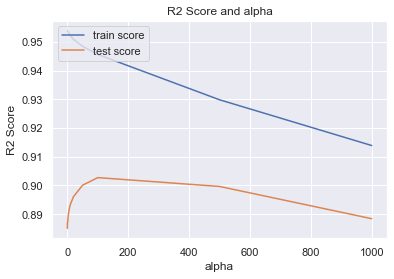

In [273]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('int32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
#plt.ylabel('Negative Mean Absolute Error')
#plt.title("Negative Mean Absolute Error and alpha")
plt.ylabel('R2 Score')
plt.title("R2 Score and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

In [274]:
cv_results.loc[cv_results.mean_test_score == cv_results.mean_test_score.max()]

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
25,0.006202,0.001166,0.0028,0.0004,100,{'alpha': 100},0.874092,0.912632,0.899548,0.931856,...,0.902744,0.019118,1,0.952137,0.945087,0.946922,0.939759,0.944459,0.945673,0.004003


##### The optimal alpha value is 100 with mean_test_score as 0.902

In [275]:

## Ridge model with optimal alpha 

alpha = 100

ridge = Ridge(alpha=alpha)

ridge = ridge.fit(X_train, y_train)

ridge.coef_

array([ 2.39931838e-02,  5.18513787e-02,  3.48627634e-02,  6.74697156e-03,
        7.71475690e-03, -3.15598802e-03,  1.17847055e-02,  4.14320707e-03,
        1.24754689e-02,  8.16522149e-03,  2.35494076e-02, -1.73610994e-03,
        4.16738002e-03,  2.42548891e-03,  2.84027421e-02,  1.05598734e-02,
        1.49027451e-02,  4.08234129e-02,  2.52729099e-02,  7.54009109e-04,
        5.22216954e-02,  1.25438517e-02, -2.54068068e-03,  1.31619701e-02,
        1.71100627e-02, -5.79895078e-04, -7.45273618e-03,  1.54434147e-02,
        1.53915943e-02,  1.03794330e-02,  4.36093588e-03,  1.83868812e-02,
        2.23449668e-02,  9.14005733e-03,  3.41175205e-03,  1.24384647e-02,
        7.58331553e-03,  1.71682265e-03,  6.04136905e-03,  1.12814214e-02,
        6.20486347e-03,  3.98301473e-03,  2.34138095e-03,  3.36959817e-04,
       -2.36228086e-02, -1.45709091e-02,  1.01857085e-03, -8.50922629e-04,
        7.02301060e-03,  1.94544677e-03,  1.88352323e-03,  1.33795549e-03,
        3.82373249e-03, -

##### Predict on train score and check the r2_score

In [276]:
#from sklearn.metrics import r2_score

y_train_pred_ridge = ridge.predict(X_train)

r2_score(y_true=y_train, y_pred=y_train_pred_ridge)

0.9432027176819414

##### Predict on test set

In [277]:
y_test_pred_ridge = ridge.predict(X_test)

In [278]:
#from sklearn.metrics import r2_score

r2_score(y_true=y_test, y_pred=y_test_pred_ridge)

0.9028110588141527

##### Top 10 predictors according to Ridge

In [279]:
zipped = zip(X_train.columns, ridge.coef_)
zipped = list(zipped) 
res = sorted(zipped, key = lambda x: abs(x[1]), reverse=True) 
res[0:10]

[('GrLivArea', 0.05222169541974011),
 ('OverallQual', 0.05185137869914925),
 ('1stFlrSF', 0.04082341289825456),
 ('OverallCond', 0.034862763421872424),
 ('TotalBsmtSF', 0.02840274208335653),
 ('SaleCondition_Normal', 0.02726297484390342),
 ('2ndFlrSF', 0.025272909941314075),
 ('LotArea', 0.023993183818923368),
 ('age_of_house', -0.023622808561562923),
 ('BsmtFinSF1', 0.023549407605563573)]

##### With Ridge, R2 score on both train and test score are > 0.90 which is very good  

## 6. Lasso Regression

##### Let's try Lasso regularized model. Begin with finding the optimal hyperparameter alpha value using GridSearchCV

In [280]:
lasso = Lasso()

params = {'alpha': [0.0001, 0.001, 0.005, 0.008, 0.01, 0.05, 0.1, 
 0.2, 0.3 ]}

# cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        #scoring= 'neg_mean_absolute_error', 
                        scoring= 'r2',
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  45 out of  45 | elapsed:    1.0s finished


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.005, 0.008, 0.01, 0.05, 0.1,
                                   0.2, 0.3]},
             return_train_score=True, scoring='r2', verbose=1)

In [281]:
cv_results = pd.DataFrame(model_cv.cv_results_)
#cv_results = cv_results[cv_results['param_alpha']<=0.01]
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.091430,0.001020,0.002400,0.000490,0.0001,{'alpha': 0.0001},0.872547,0.895669,0.886251,0.909381,...,0.891425,0.012059,5,0.960236,0.952968,0.954860,0.948915,0.951638,0.953723,0.003788
1,0.022206,0.001327,0.002201,0.000400,0.001,{'alpha': 0.001},0.875182,0.912899,0.898006,0.930433,...,0.903076,0.018256,3,0.955906,0.947248,0.950579,0.942612,0.946383,0.948545,0.004469
2,0.013799,0.009622,0.002204,0.000395,0.005,{'alpha': 0.005},0.881624,0.913245,0.906579,0.942115,...,0.910712,0.019268,1,0.940906,0.932861,0.935069,0.927428,0.931859,0.933625,0.004409
3,0.009001,0.003037,0.002202,0.000399,0.008,{'alpha': 0.008},0.878654,0.904049,0.901504,0.939388,...,0.904683,0.019576,2,0.931791,0.923507,0.926983,0.918137,0.922958,0.924675,0.004539
4,0.007801,0.001597,0.002001,0.000002,0.01,{'alpha': 0.01},0.874865,0.898507,0.897736,0.936452,...,0.900375,0.019997,4,0.925804,0.917293,0.921481,0.911877,0.917602,0.918811,0.004645


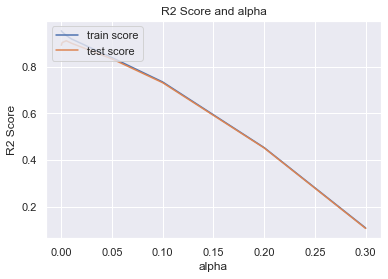

In [282]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('float32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')

#plt.ylabel('Negative Mean Absolute Error')
#plt.title("Negative Mean Absolute Error and alpha")

plt.ylabel('R2 Score')
plt.title("R2 Score and alpha")

plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

In [283]:
cv_results.loc[cv_results.mean_test_score == cv_results.mean_test_score.max()]

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
2,0.013799,0.009622,0.002204,0.000395,0.005,{'alpha': 0.005},0.881624,0.913245,0.906579,0.942115,...,0.910712,0.019268,1,0.940906,0.932861,0.935069,0.927428,0.931859,0.933625,0.004409


##### The optimal alpha is 0.005 with mean_test_score at 0.91

In [284]:
#alpha =50

## Lasso regression using optimal alpha

alpha = 0.005

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train, y_train) 

Lasso(alpha=0.005)

In [285]:
lasso.coef_

array([ 1.58775231e-02,  7.83758078e-02,  3.43524635e-02,  2.98413527e-03,
        8.60176644e-03, -0.00000000e+00,  5.53266410e-03,  0.00000000e+00,
        1.20096354e-02,  1.15866584e-03,  2.87671955e-02, -0.00000000e+00,
        0.00000000e+00, -0.00000000e+00,  3.08173668e-02,  1.08255400e-02,
        1.06070392e-02,  8.27918692e-03,  0.00000000e+00, -1.72129573e-03,
        1.33032686e-01,  8.94843964e-03, -0.00000000e+00,  0.00000000e+00,
        5.68650216e-03,  0.00000000e+00, -7.73080459e-03,  1.29398684e-02,
        0.00000000e+00,  6.46114605e-03,  6.15073383e-03,  2.65953973e-02,
        1.46072995e-02,  7.23397713e-03,  0.00000000e+00,  9.69124832e-03,
        4.08606838e-03,  0.00000000e+00,  0.00000000e+00,  5.69522615e-03,
        1.12525142e-03,  0.00000000e+00, -0.00000000e+00,  0.00000000e+00,
       -3.75145303e-02, -1.43355413e-02, -0.00000000e+00, -0.00000000e+00,
        6.34848729e-04,  0.00000000e+00,  0.00000000e+00, -0.00000000e+00,
        0.00000000e+00, -

##### Predict on train set

In [286]:
#from sklearn.metrics import r2_score

y_train_pred_lasso = lasso.predict(X_train)
r2_score(y_true=y_train, y_pred=y_train_pred_lasso)

0.9309515137609345

##### Predict on test set

In [287]:
y_test_pred_lasso = lasso.predict(X_test)

In [288]:
r2_score(y_true=y_test, y_pred=y_test_pred_lasso)

0.922866512991026

##### Top 10 predictors according to Lasso

In [289]:
zipped = zip(X_train.columns, lasso.coef_)
zipped = list(zipped) 
res = sorted(zipped, key = lambda x: abs(x[1]), reverse=True) 
res[0:10]

[('GrLivArea', 0.13303268573101854),
 ('OverallQual', 0.07837580778956574),
 ('age_of_house', -0.03751453029988701),
 ('OverallCond', 0.03435246351610221),
 ('TotalBsmtSF', 0.030817366819324506),
 ('BsmtFinSF1', 0.028767195532131612),
 ('GarageCars', 0.026595397325101976),
 ('SaleType_New', 0.02455879793940438),
 ('MSZoning_RL', 0.02186877180303806),
 ('Neighborhood_Crawfor', 0.018307166396724976)]

In [290]:
lasso_var = []
lasso_rej =  []
for var, coef in zipped:
    if abs(coef) > 0:
        lasso_var.append(var) 
    else:
        lasso_rej.append(var)

In [291]:
print(len(lasso_var))
print(len(lasso_rej))

75
152


##### With Lasso, R2 score on test set is 0.92 which looks better than Ridge.

## 7. Linear Regression after dimensionality Reduction with PCA

In [298]:
X_train.shape

(1015, 227)

In [299]:
from sklearn.decomposition import PCA

In [300]:
pca = PCA(0.9)

In [301]:
df_train_pca = pca.fit_transform(X_train)

In [302]:
df_train_pca.shape

(1015, 117)

##### Using PCA, we have reduced the dimensions from 227 to 117.

In [303]:
df_train_pca

array([[ 1.14597624, -3.386659  , -0.12674054, ...,  0.31961647,
        -0.51707273,  0.39412471],
       [-2.67202495,  1.3234694 ,  0.26401856, ...,  0.5068264 ,
         0.49783551, -0.3610891 ],
       [ 1.59554394, -1.21066708,  2.75152888, ..., -0.31275264,
         0.60055065,  0.33905047],
       ...,
       [-1.63529505, -3.17657699,  0.75438992, ...,  0.15736104,
         0.46348527,  1.66895316],
       [ 4.82242874,  3.78004813,  0.13040963, ..., -0.12428414,
        -0.8364344 , -1.06364438],
       [ 0.50159857, -2.52976542,  0.34940944, ...,  0.89343351,
        -0.92919569, -0.59174934]])

In [304]:
 lr2 = LinearRegression()

In [305]:
lr2 = lr2.fit(df_train_pca, y_train)

##### Predictions on train set

In [308]:
# Making predictions
y_train_pred_pca = lr2.predict(df_train_pca)

In [309]:
r2_score(y_true=y_train, y_pred=y_train_pred_pca)

0.9208446509294409

##### Predictions on test set

In [310]:
df_test_pca = pca.transform(X_test)
df_test_pca.shape

(435, 117)

In [311]:
# Making predictions
y_test_pred_pca = lr2.predict(df_test_pca)

In [312]:
r2_score(y_true=y_test, y_pred=y_test_pred_pca)

0.8938049036158501

#### With PCA followed by Linear Regression model, we see good r2 score with both train and test set

###  Experiment - Lasso Regression on PCA transformed data set

In [314]:
lasso_pca = Lasso()

params = {'alpha': [0.0001, 0.001, 0.005, 0.008, 0.01, 0.05, 0.1, 
 0.2, 0.3 ]}

# cross validation
model_cv = GridSearchCV(estimator = lasso_pca, 
                        param_grid = params, 
                        #scoring= 'neg_mean_absolute_error', 
                        scoring = 'r2',
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(df_train_pca, y_train)

Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  45 out of  45 | elapsed:    0.0s finished


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.005, 0.008, 0.01, 0.05, 0.1,
                                   0.2, 0.3]},
             return_train_score=True, scoring='r2', verbose=1)

In [315]:
cv_results = pd.DataFrame(model_cv.cv_results_)
#cv_results = cv_results[cv_results['param_alpha']<=0.01]
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.005401,0.003068,0.000601,0.000491,0.0001,{'alpha': 0.0001},0.818358,0.886329,0.824772,0.790474,...,0.830754,0.031337,6,0.930207,0.923050,0.926422,0.918392,0.926919,0.924998,0.004007
1,0.002599,0.000793,0.000401,0.000491,0.001,{'alpha': 0.001},0.852179,0.890149,0.874126,0.906334,...,0.875547,0.020657,4,0.929424,0.922492,0.925566,0.916991,0.926229,0.924140,0.004199
2,0.001597,0.000487,0.000401,0.000491,0.005,{'alpha': 0.005},0.867563,0.901165,0.880464,0.933815,...,0.890552,0.024687,1,0.919413,0.912923,0.916661,0.906344,0.917116,0.914491,0.004575
3,0.001600,0.000486,0.000400,0.000490,0.008,{'alpha': 0.008},0.866755,0.900584,0.879974,0.934078,...,0.890350,0.024823,2,0.910767,0.903551,0.909548,0.897525,0.908069,0.905892,0.004845
4,0.001804,0.000402,0.000201,0.000403,0.01,{'alpha': 0.01},0.863741,0.897121,0.878284,0.932010,...,0.887876,0.024875,3,0.905627,0.897930,0.904331,0.891428,0.902670,0.900397,0.005187


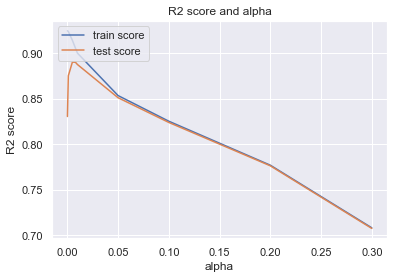

In [316]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('float32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')

#plt.ylabel('Negative Mean Absolute Error')
#plt.title("Negative Mean Absolute Error and alpha")

plt.ylabel('R2 score')
plt.title("R2 score and alpha")

plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

In [317]:
cv_results.loc[cv_results.mean_test_score == cv_results.mean_test_score.max()]

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
2,0.001597,0.000487,0.000401,0.000491,0.005,{'alpha': 0.005},0.867563,0.901165,0.880464,0.933815,...,0.890552,0.024687,1,0.919413,0.912923,0.916661,0.906344,0.917116,0.914491,0.004575


In [318]:
alpha = 0.005

lasso2 = Lasso(alpha=alpha)
        
lasso2.fit(df_train_pca, y_train) 

Lasso(alpha=0.005)

In [319]:
lasso2.coef_

array([-8.59255276e-02,  9.01913193e-04,  4.83160650e-02,  1.46623157e-02,
       -2.45120977e-02,  1.57708930e-02, -4.87997906e-03,  6.05791789e-03,
       -2.61868732e-03,  4.31998168e-03,  9.31909501e-03, -8.80774971e-03,
       -4.56827932e-03, -1.33578702e-02, -0.00000000e+00,  1.32983561e-03,
        4.86416651e-03,  1.15792361e-02,  5.13629194e-03,  2.01588697e-03,
        0.00000000e+00,  4.22125569e-03,  1.28327511e-02,  8.52663219e-03,
       -1.26430622e-02, -0.00000000e+00,  2.09727117e-03, -2.72089216e-03,
       -4.67038312e-03, -0.00000000e+00, -1.88212254e-02, -3.85815703e-03,
        4.70680280e-03,  0.00000000e+00,  6.00369688e-04,  0.00000000e+00,
        1.21443202e-03,  2.23010305e-03,  0.00000000e+00,  1.57803385e-03,
       -0.00000000e+00,  0.00000000e+00,  3.87484678e-03,  0.00000000e+00,
       -7.96218614e-03,  0.00000000e+00, -0.00000000e+00, -8.43203744e-03,
       -0.00000000e+00, -0.00000000e+00, -0.00000000e+00,  5.68659778e-03,
       -0.00000000e+00, -

In [320]:
#from sklearn.metrics import r2_score

y_train_pred_lasso2 = lasso2.predict(df_train_pca)
r2_score(y_true=y_train, y_pred=y_train_pred_lasso2)

0.9110435152760537

In [321]:
# Making predictions on test set
y_test_pred_lasso2 = lasso2.predict(df_test_pca)

In [322]:
r2_score(y_true=y_test, y_pred=y_test_pred_lasso2)

0.8954970542498935

In [323]:
lasso2_var = []
lasso2_rej =  []
for coef in lasso2.coef_:
    if abs(coef) > 0:
        lasso2_var.append(var) 
    else:
        lasso2_rej.append(var)

In [325]:
print(len(lasso2_var))
print(len(lasso2_rej))

60
57


## 8. Conclusion

#### Ridge Regression model R2-Score = 0.9028110588141527

#### Lasso Regression model R2-Score = 0.922866512991026

#### After PCA, Linear Regression model score = 0.8938049036158501

#### After PCA, Lasso model score = 0.8954970542498935